In [11]:
import sentencepiece as spm

In [139]:
fname = '/scratche/home/apoorv/transformer-kgc/data/wikidata5m_v3/train.txt'
f = open(fname)
train_inputs = []
for line in f:
    line = line.split('\t')
    train_inputs.append(line[0])
f.close()

In [140]:
len(train_inputs)

42687362

In [141]:
train_inputs[:10]

['|TAIL| Lalit Kumar Goel||| instance of',
 '|HEAD| human||| instance of',
 '|TAIL| Ugo Riccarelli||| languages spoken, written or signed',
 '|HEAD| Italian||| languages spoken, written or signed',
 '|TAIL| Road to Paradise||| director',
 '|HEAD| William Beaudine||| director',
 '|TAIL| Robert van der Horst||| country of citizenship',
 '|HEAD| Kingdom of the Netherlands||| country of citizenship',
 '|TAIL| Wesley Pionteck Souza||| member of sports team',
 '|HEAD| Santos F.C.||| member of sports team']

In [142]:
import random
num_samples = 4000000
sample_for_sp_training = random.sample(train_inputs, num_samples)

In [143]:
sp_data_fname = '/scratche/home/apoorv/transformer-kgc/data/wikidata5m_v3/lines_for_sp_training.txt'
f = open(sp_data_fname, 'w')
for line in sample_for_sp_training:
    f.write(line + '\n')
f.close()

In [72]:
# now train using reduced sample
# training performed using command line python

sp_data_fname = '/scratche/home/apoorv/transformer-kgc/data/wikidata5m_v3/lines_for_sp_training.txt'
vocab_size = 32000
user_defined_symbols = ['|TAIL|', '|HEAD|', '|||']
# user_defined_symbols = ['|||']
sp = spm.SentencePieceTrainer.train(input=sp_data_fname,
                                    model_prefix='sp_wd5m_v3', 
                                    vocab_size=vocab_size, 
                                    user_defined_symbols=user_defined_symbols,
                                    model_type='BPE',
                                    character_coverage=1.0,
                                    split_by_whitespace=False, # better compress relations?
                                    add_dummy_prefix=True,
                                    byte_fallback=True,
                                    pad_id=3,
                                    train_extremely_large_corpus=True # does nothing for BPE afaik
                                   )

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /scratche/home/apoorv/transformer-kgc/data/wikidata5m_v3/lines_for_sp_training.txt
  input_format: 
  model_prefix: sp_wd5m_v3
  model_type: BPE
  vocab_size: 32000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 0
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  user_defined_symbols: |head|
  user_defined_symbols: |tail|
  user_defined_symbols: |||
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: 3
  unk_piece: <unk>
  bos_piece: <s>
  

KeyboardInterrupt: 

55331 active=12028 piece=uff
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=163 size=1900 all=156260 active=12957 piece=▁man
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=163 min_freq=27
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=161 size=1920 all=157037 active=8553 piece=▁(19
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=159 size=1940 all=157934 active=9450 piece=Bl
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=157 size=1960 all=159335 active=10851 piece=lop
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=155 size=1980 all=160734 active=12250 piece=arn
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=154 size=2000 all=162232 active=13748 piece=▁International
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=153 min_freq=25
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=152 size=2020 all=163417 active=9242 piece=ed▁in
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=150 size=2040 all=164715 active=10540 piece=▁mus
bpe_model_trainer.c

In [146]:
# sp = spm.SentencePieceProcessor(model_file='data/sentencepiece/sp_wd5m_v2.model')
sp = spm.SentencePieceProcessor(model_file='sp_wd5m_v3.model')

In [147]:
train_inputs[0]

'|TAIL| Lalit Kumar Goel||| instance of'

In [148]:
for i in range(10):
    print(len(sp.encode(train_inputs[i])))

9
5
12
9
6
7
8
7
11
9


In [151]:
sp.encode('America')

[491]

In [152]:
sp.id_to_piece(491)

'▁America'

In [154]:
# x = "Who's Got the 10½?"
x = "Felicia´s svenska suite"
x = "___"
x = "|head|x86_64|||platform"
x = "8½"
x = "Greatest Hits… So Far!!!"
x = "|HEAD| x86_64||| platform"
sp.decode([sp.encode(x)])

['|HEAD| x86_64||| platform']

In [115]:
# e2wdid = get_entity_wd_id_dict('data/wikidata5m/aliases.txt')
entity_names = []
fname = "/scratche/prod/apoorv/wd5m_aliases_entities_v3.txt"
f = open(fname)
for line in f:
    line = line.rstrip().split('\t')
    entity_names.append(line[1])

In [119]:
from tqdm.auto import tqdm
i = 0
for e in tqdm(entity_names):
    tokenized = sp.encode(e)
    if 0 in tokenized:
        print(i, e)
    i+= 1

  0%|          | 0/4818679 [00:00<?, ?it/s]

61000 Chiba - Japanese family name (千葉)
62547 רק מכבי!
140473 Takayama - Japanese family name (高山)
160930 ʿAbd-al-Wahhāb Ibn-ʿAlī Tāǧ-ad-Dīn as-Subkī
165034 Toku-hime - [徳姫] daughter of Oda Nobunaga; wife of Matsudaira Nobuyasu
175976 Okazaki - Japanese family name (岡崎)
223888 Ji - Chinese surname 季
261383 Ji - surname 嵇
303545 Fujisawa - family name (藤沢)
344226 Ṣabāḥ
353996 Song - Korean family name (송)
356003 Bo - Chinese surname 薄
362237 Jar of Fliesвнщэ
380360 Land grant to Ḫunnubat-Nanaya kudurru
405888 D♭
406256 مهدی گندی
408725 B♭
438942 Е
443303 Mr.Moonlight 〜愛のビッグバンド〜
443914 A♭
454808 ∞
457640 حمزہ نامہ
466072 Han - Korean family name (한)
489699 ∠ Trigger
490493 G♭
491797 Sakurai - Japanese family name (櫻井)
507155 Reishi-naishinnō - [姈子] daughter emperor Go-Fukakusa
508454 AӀexey UӀyukaev
512957 Ėngelʹsina Ardanovna Markizova
515490 Beinn Ìme
532508 E♭
540082 Apostolos Angelis - Greek composer, engineer and producer of Εlectronic, Classical and Orchestral music
555958 LOL <(^^

2536595 Ԫ
2541784 Shan - Chinese family name (單 / 单)
2549296 Aṣ-Ṣaidanānī
2551725 Ꚙ
2557663 Ueda - Japanese family name (上田 or 植田)
2559833 Ωmega
2560740 ظ
2568347 Nguyễn Hữu Phúc
2571444 Ĥ
2579498 Ɉ
2580893 Ẑ
2593495 Ŕ
2600585 Ү
2603001 Mallika - female given name (मल्लिका)
2608485 ^txt2regex$
2617186 Ƚ
2623596 Ᵹ
2628236 Phú Hữu
2629819 Ѡ
2630797 Tsuru - Japanese given name & family name (鶴)
2634726 Tang - Chinese surname 湯/汤
2645789 Green-backed Twinspotאפ,מז
2649227 コレクション
2654212 Gloǵi
2654879 Ӧ
2655812 Ӄ
2658395 Р̌
2662274 Ҧ
2662460 Ԩ
2665573 Kaḏḏa Dâbali
2671890 Ю̈
2672182 Ӟ
2677065 Wakasa - Japanese family name (若狭)
2680044 Ў
2681714 Malá Tŕňa
2694121 /ðəˈbæzɪtʃ/
2696409 Kūh-e Ḩowẕ-e Solţān Sār
2697502 list of monuments in Kerċem
2703825 Ḫartapu
2707431 Ě
2707907 Ӝ
2710059 ᚠ
2711013 Yoshioka - Japanese family name (吉岡)
2715708 Esiẹ
2717104 Tiên Lữ
2717658 А̊
2721426 A Beautiful Reel. B'z Live-Gym 2002 Green ~Go★Fight★Win~
2721942 Mosaddek Hossain ‍Saikat
2724364 Ƴ
2725040 Pabilsa

3933025 Apabhraṃśa
3936067 Ԧ
3945940 Ukrainian locomotive class ДЕ1
3950610 Banu - Plural des arabischen Worts Ibn (‚Sohn‘) und im Sinne von „Söhne Stammesnamen
3951240 Ӆ
3959028 Nari - Korean female given name (나리)
3959132 ⠛
3964415 Ҿ
3964416 Ҽ
3966067 ɪ
3972665 𓆤
3974434 Land grant to Ḫasardu kudurru
3974921 OOEYヨOO -EYヨ REMIX
3978994 Ɩ
3980929 Ѳ
3981014 Ė
3987406 ʮ
3991328 Kẻ Sặt
3996013 Elizaveta Ėsperovna Belosel'skaja-Belozerskaja
4012864 Riḍwan
4023448 Ɯ
4024637 The Voice 决战好声
4024986 Kanada - Japanese family name (金田)
4027785 Ẋ
4031263 Tŕnie
4033644 अ
4037682 Ⱬ
4039148 Ɔ
4040710 Mṛcchakaṭikā
4046279 Ҫ
4055479 Ukrainian locomotive class ТЕП150
4061451 Al-H̨āyir
4068891 Sẁiẁs Provincial Park
4075320 Ƞ
4076234 Noong Hẹt
4077568 σ-compact space
4082510 Meḳiẓe Nirdamim
4083868 Ṛ
4087275 Viśa' Saṃbhava
4090118 Video G∞ver
4092750 Լոնդոնի պալադիում
4097109 公民黨
4100992 Ԁ
4102201 甲山
4103204 Maɗa language
4109689 DD ಮ್
4113712 𓆎
4117379 𓃛
4125120 Laṇḍā scripts
4126667 Ҩ
4127980 আ
4128399

In [22]:
import unicodedata

normalized_entity_names = []
normalized_entity_names_set = set()
for e in tqdm(entity_names):
    ne = unicodedata.normalize('NFKC', e)
    normalized_entity_names.append(ne)
    if ne in normalized_entity_names_set:
        print(e, ne)
    else:
        normalized_entity_names_set.add(ne)

  0%|          | 0/4818679 [00:00<?, ?it/s]

Ainsi soit je… Ainsi soit je...
...Baby One More Time ...Baby One More Time
Oops!… I Did It Again Oops!... I Did It Again
Avant que l'ombre... Avant que l'ombre...
1012 1012
Now You See It… Now You See It...
Dear... Dear...
C3 C3
E=MC2 E=MC2
K² K2
6₂ 62
M² M2
6₃ 63
7₁ 71
Iris Ⅱ Iris II
All Good Things... All Good Things...
DNA2 DNA2
And Another Thing… And Another Thing...
J2 J2
Mark III Mark III
ARA Azopardo ARA Azopardo
I Am... World Tour I Am... World Tour
7₄ 74
H2O: Just Add Water H2O: Just Add Water
M³ M3
E2 E2
No3 No3


In [34]:
sp.decode([[31895, 5, 12986, 16, 5801, 1945, 62, 6, 26, 10]])

['|tail|Lalit Kumar Goel|||instance of']

In [113]:
random.shuffle(train_inputs)

In [155]:
from tqdm.notebook import tqdm
lengths = []
for line in tqdm(train_inputs[:1000000]):
    x = sp.encode(line)
    lengths.append(len(x))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [161]:
max(lengths), min(lengths)

(59, 5)

In [157]:
import statistics
statistics.median(lengths)

7.0

In [158]:
sp['</s>']

2

In [159]:
count = 0
for l in lengths:
    if l > 30:
        count += 1
count

52

Text(0.5, 0, 'Tokenized lengths')

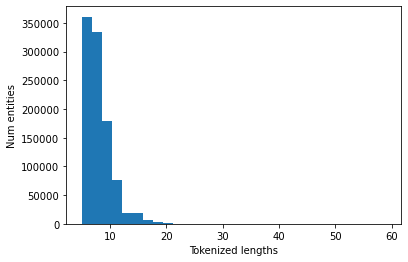

In [160]:
import matplotlib.pyplot as plt 

import numpy as np 

%matplotlib inline

# x = np.random.normal(size = 1000) 
x = lengths
plt.hist(x, bins=30) 

plt.ylabel('Num entities');
plt.xlabel('Tokenized lengths')

In [107]:
input1 = 'predict head: obama | position held |'
input2 = 'predict tail: f | f |'
out = sp.encode([input1, input2])
for x in out:
    x.append(sp['</s>'])
length = max(map(len, out))
y = np.array([xi+[sp['<pad>']]*(length-len(xi)) for xi in out])
y

array([[    5,     7,     4, 21171,     3,    88,   257,     3,     2],
       [    5,     8,     4,    68,     3,    68,     3,     2,     0]])

In [96]:
lengths = [len(x) for x in out]
lengths

[9, 8]

In [100]:
max_len = max(lengths)
attention_mask = np.zeros((len(lengths), max_len), dtype=np.long)
for i, l in enumerate(lengths):
    attention_mask[i][:l] = np.ones((l), dtype=np.long)
attention_mask

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [117]:
import torch
x = torch.LongTensor(y)
x

tensor([[    5,     7,     4, 21171,     3,    88,   257,     3,     2],
        [    5,     8,     4,    68,     3,    68,     3,     2,     0]])

In [119]:
sp.decode([0, 0, 0])

' ⁇  ⁇  ⁇ '

In [81]:
import numpy as np
lengths = [len(x) for x in out]
max_len = max(lengths)
# np.pad(out, (1,1))
x = np.zeros((len(out), max_len), dtype=np.long)
x[0] = out[0]
x[1][:lengths[1]] = out[1]

In [116]:
x = sp.encode('hello f')
x.append(sp['</s>'])
x = np.array(x)
x = x.tolist()
print(x)
sp.decode(x)

[8318, 68, 2]


'hello f'

In [41]:
for _ in range(5):
    x = sp.encode('predict head: obama | position held |', out_type=str, enable_sampling=True, alpha=0.5, nbest_size=-1)
    print(x)

['▁predict', '▁head', ':', '▁obama', '▁|', '▁position', '▁held', '▁|']
['▁predict', '▁head', ':', '▁obama', '▁|', '▁position', '▁held', '▁|']
['▁predict', '▁head', ':', '▁obama', '▁|', '▁position', '▁hel', 'd', '▁|']
['▁predict', '▁head', ':', '▁obama', '▁|', '▁position', '▁held', '▁|']
['▁predict', '▁head', ':', '▁ob', 'ama', '▁|', '▁position', '▁held', '▁|']


In [3]:
import os
from transformers import XLMTokenizer
from transformers import PreTrainedTokenizer
from transformers import GPT2Tokenizer

def saveBPETokenizer(tokenizer, prefix):
    # make directory for tokenizer
    path = os.path.join('data/bpe', prefix)
    if not os.path.exists(path):
        os.mkdir(path)
    # save + load data
    main_fname = 'data/bpe/{}/main.json'.format(prefix)
    tokenizer.save(main_fname)
    f = open(main_fname, 'r')
    data = json.load(f)
    f.close()
    #save data in format required by transformers.PretrainedTokenizer
    vocab_fname = 'data/bpe/{}/vocab.json'.format(prefix)
    merges_fname = 'data/bpe/{}/merges.txt'.format(prefix)
    json_object = json.dumps(data['model']['vocab'])
    with open(vocab_fname, "w") as outfile:
        outfile.write(json_object)
    f = open(merges_fname, 'w')
    for x in data['model']['merges']:
        f.write(x +'\n')
    f.close()
    print('Saved')
    
def saveWordPieceTokenizer(tokenizer, prefix):
    # make directory for tokenizer
    path = os.path.join('data/wordpiece', prefix)
    if not os.path.exists(path):
        os.mkdir(path)
    # save + load data
    main_fname = 'data/wordpiece/{}/main.json'.format(prefix)
    tokenizer.save(main_fname)
    print('Saved')



def loadBPETokenizer(prefix):
    vocab_fname = 'data/bpe/{}/vocab.json'.format(prefix)
    merges_fname = 'data/bpe/{}/merges.txt'.format(prefix)
#     tokenizer = XLMTokenizer(vocab_file=vocab_fname, merges_file=merges_fname)
    tokenizer = GPT2Tokenizer(vocab_file=vocab_fname, merges_file=merges_fname, 
                              unk_token='<unk>', 
                              bos_token='<s>', 
                              eos_token='</s>', 
                              add_prefix_space=True)
    return tokenizer

In [4]:
# saveBPETokenizer(tokenizer, 'codexm{}'.format(vocab_size))
saveWordPieceTokenizer(tokenizer, 'wikidata5m_{}'.format(vocab_size))

Saved


In [6]:
# text = train_data[0]
text = 'hello world'
tokenizer.encode_batch(["predict tail: obama | united states of america |", "How are you 😁 ?", text])

[Encoding(num_tokens=10, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=5, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=2, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])]

In [7]:
text = 'hello world  </s>'
tokenizer.enable_padding(pad_id=2, pad_token="<pad>")
x = tokenizer.encode_batch(["Hello, y'all!", "How are you 😁 ?", text])
x[2].tokens

['hello', 'world', '</s>', '<pad>', '<pad>', '<pad>']

In [12]:
x = tokenizer.encode('predict relation: obama | united states of america | </s>').ids
y = tokenizer.encode('fsadlk jfasdkf jsadlkfjas lkdjf').ids
out = tokenizer.decode_batch([x,y], skip_special_tokens=True)
# for x in out:
#     x = x.replace(' ##', '')
#     print(x)

In [8]:
y = tokenizer.encode('predict tail: obama | united states of america | </s>')
y.tokens

['predict',
 'tail',
 ':',
 'obama',
 '|',
 'united',
 'states',
 'of',
 'america',
 '|',
 '</s>']

In [236]:
tokenizer.encode('<pad>').ids[0]

2

In [209]:
tk = loadBPETokenizer('codexm{}'.format(vocab_size))

In [210]:
text = ' hello world'

In [270]:
tokenized = tk(text, truncation=True, max_length=128, return_tensors="pt")
# tokenized_ids = [0 if token == None else token for token in tokenized.input_ids]
# ''.join(tk.convert_ids_to_tokens(tokenized_ids))

In [59]:
t5tk.pad_token_id

0

In [277]:
import numpy as np
x = [1,2,3,4]
x = np.array(x)
np.stack([x,x])

array([[1, 2, 3, 4],
       [1, 2, 3, 4]])

In [259]:
from transformers import BatchEncoding
da = {}
da['input_ids'] = x.input_ids
da['attention_mask'] = x.attention_mask
da2 = BatchEncoding(da)
da2.input_ids

[3,
 65,
 42,
 36,
 53,
 3,
 77,
 31,
 3,
 34,
 3,
 1115,
 56,
 3,
 1587,
 3,
 617,
 3,
 60,
 3,
 193,
 3,
 111,
 3,
 60,
 3,
 554,
 3,
 777,
 107,
 122,
 211]

In [118]:
train_data = []
fname = 'data/codex-m/train.txt'
f = open(fname, 'r')
for line in f:
    train_data.append(line.strip())

In [197]:
tk.unk_token 

'<unk>'

In [20]:
import json
  
# Opening JSON file
fname = "data/tokenizer-codexm-2k.json"
f = open(fname, 'r')
  
# returns JSON object as 
# a dictionary
data = json.load(f)


In [22]:
kwargs = {
    'pretrained_vocab_files_map ': data
}


In [26]:
# tokenizer =  XLMTokenizer(vocab_file='vocab.json', merges_file='merges.txt')

Calling PreTrainedTokenizer.from_pretrained() with the path to a single file or url is deprecated


IndexError: list index out of range

In [88]:
xlmtk = XLMTokenizer.from_pretrained('xlm-mlm-en-2048')

In [89]:
xlmtk.convert_ids_to_tokens([0,1,2,3,4,5,6,7,8])

['<s>',
 '</s>',
 '<pad>',
 '<unk>',
 '<special0>',
 '<special1>',
 '<special2>',
 '<special3>',
 '<special4>']

In [90]:
xlmtk.special_tokens

AttributeError: 'XLMTokenizer' object has no attribute 'special_tokens'

In [74]:
mytk = XLMTokenizer(vocab_file='vocab.json', merges_file='merges.txt')

In [75]:
mytk.convert_ids_to_tokens([0,1,2,3,4,5])

['<unk>', '<s>', '</s>', '<pad>', '<mask>', '!']

In [33]:
tokenizer.save('data/bpe', 'codexm2k')


TypeError: Can't convert 'codexm2k' to PyBool

In [34]:
tokenizer.save

<function Tokenizer.save(self, pretty=False)>

In [39]:
f = open('merges.txt', 'w')
for x in data['model']['merges']:
    f.write(x +'\n')
f.close()

In [42]:
from transformers import XLMTokenizer

In [44]:
tk2 = XLMTokenizer(vocab_file='vocab.json', merges_file='merges.txt')

In [45]:
tk2.vocab_size

2000

In [29]:
from transformers import T5Tokenizer

In [30]:
t5tk = T5Tokenizer.from_pretrained('t5-small')

In [60]:
t5tk.convert_tokens_to_ids('<e>')

2

In [35]:
t5tk('hello <s>')

{'input_ids': [21820, 3, 2, 7, 3155, 1], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [76]:
t5tk.convert_ids_to_tokens([0,1,2,3,4,5])

['<pad>', '</s>', '<unk>', '▁', 'X', '.']